Eigenvalues with np.linalg: [-36.43358841 -23.8159298  -20.86783803 -19.43997483 -12.85885758
 -11.26948042  -8.60384659  -8.28852457  -5.14712395  -3.89776607
  -0.65693952   0.           0.           0.           0.
   3.68478741   5.21558779   6.2637151    9.07539524  11.2082299
  14.21774913  20.0394933   20.96062156  24.11435484  40.4999355 ]
Eigenvalues with lanczos_method: [-36.42214592 -17.64780484  -0.67974176  10.90581846  21.18220985
  40.49910203]


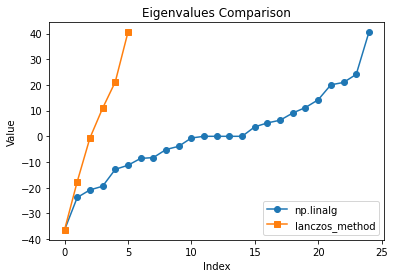

In [24]:
import numpy as np
import matplotlib.pyplot as plt

def gen_matrix():
    A = np.zeros((25, 25))
    n = np.random.randint(20, size=40)
    for k in range(len(n)):
            i = np.random.randint(25)
            j = np.random.randint(25)
            A[i][j] = n[k]
            A[j][i] = n[k]
    return A

def max_matrix_elem(A):
    i_max, j_max, max_elem = 0, 0, 0
    for i in range(A[0].size):
        for j in range(i+1, A[0].size):
            if (abs(A[i][j])>max_elem):
                max_elem = abs(A[i][j])
                i_max = i
                j_max = j
    return i_max, j_max, max_elem

def rotation_method(A, eps):
    Ak = np.copy(A)
    eigen_vectors =  np.eye(A[0].size)
    i_max, j_max, max_elem = max_matrix_elem(Ak)
    count = 0
    while (max_elem>eps):
        phi = 0.5*np.arctan(2*Ak[i_max][j_max]/(Ak[i_max][i_max]-Ak[j_max][j_max]))
        U = np.eye(Ak.shape[0])
        U[i_max][j_max] = -np.sin(phi)
        U[j_max][i_max] = np.sin(phi)
        U[i_max][i_max] = np.cos(phi)
        U[j_max][j_max] = np.cos(phi)
        Ak = U.T @ Ak @ U
        eigen_vectors = eigen_vectors @ U
        count += 1
        i_max, j_max, max_elem = max_matrix_elem(Ak)
    eigen_values = np.array([Ak[i][i] for i in range(A[0].size)])
    return eigen_vectors, eigen_values, count

def lanczos_method(A, b, iters, EPSILON):
    Q = np.zeros((A.shape[0], iters + 1))
    alpha = np.zeros((iters))
    beta = np.zeros((iters))
    Q[:,0] = b/np.linalg.norm(b)
    for m in range(iters):
        if np.linalg.norm(b) <= EPSILON:
            break
        v = np.dot(A, Q[:,m])
        alpha[m] = np.dot(Q[:,m],v)
        if m == 0:
            v = v - alpha[m]*Q[:,m]
        else:
            v = v - alpha[m]*Q[:,m] - beta[m-1]*Q[:,m-1]
        beta[m] = np.linalg.norm(v)
        Q[:,m+1] = v/beta[m]

    T = np.dot(np.dot(Q.T,A), Q)
    Vec_T, Val, _ = rotation_method(T, 1e-16)
    Vec = Q@Vec_T
    return Vec, Val

A = gen_matrix()

np.set_printoptions(suppress=True)
EPSILON = 0.00000000000000001

b = np.random.rand(A.shape[0])

iters = 5
Vec, Val = lanczos_method(A, b, iters, EPSILON)
linalg_eigenvalues = np.sort(np.real(np.linalg.eigvals(A)))
kp_eigenvalues = np.sort(Val)
print("Eigenvalues with np.linalg:", linalg_eigenvalues)
print("Eigenvalues with lanczos_method:", kp_eigenvalues)

# Отображение на графике
plt.plot(linalg_eigenvalues, 'o-', label='np.linalg')
plt.plot(kp_eigenvalues, 's-', label='lanczos_method')
plt.title("Eigenvalues Comparison")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.show()